<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/Dogecoin_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [ ]:
data.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],
							infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()

<ipython-input-7-5e308f85a602>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'],


Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [ ]:
data.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [ ]:
data = data.dropna()

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

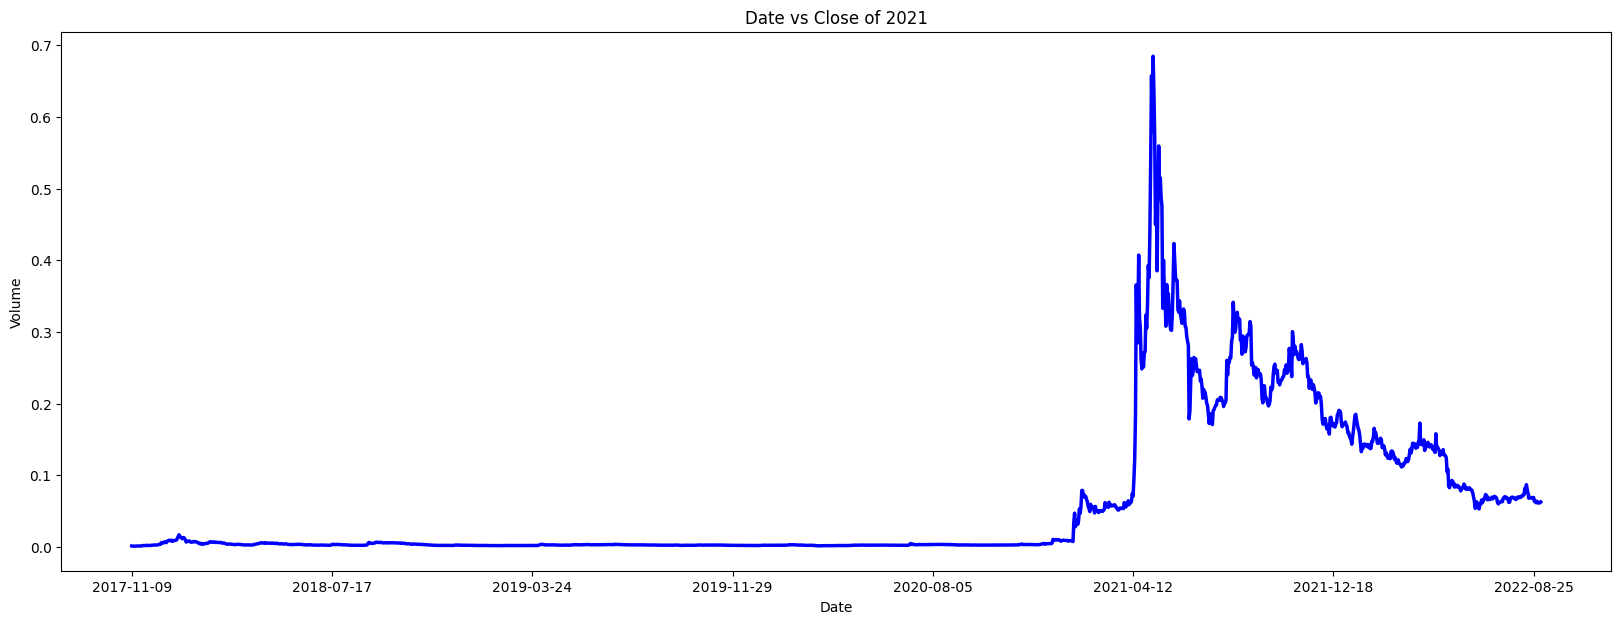

In [ ]:
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

In [ ]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr(numeric_only=True)["Close"].sort_values(ascending=False))

,Close
Close,1.000000
Adj Close,1.000000
High,0.995104
Low,0.994575
Open,0.992514
Volume,0.588678
b,0.456479
gap,0.383333
a,0.172057
z,0.063251


In [ ]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
0,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
1,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
3,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
4,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [ ]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)

(11, 5) (19, 5)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
	"Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Mon, 28 Jul 2025   AIC                            -79.326
Time:                        03:10:02   BIC                            -76.905
Sample:                             0   HQIC                           -81.981
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.0

In [ ]:
start = 11
end = 29
predictions = results.predict(
	start=start,
	end=end,
	exog=test.drop("Close", axis=1))
predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
11,0.097293
12,0.083717
13,0.075957
14,0.069575
15,0.071583
16,0.072099
17,0.071244
18,0.072458
19,0.072406
20,0.071893


<Axes: >

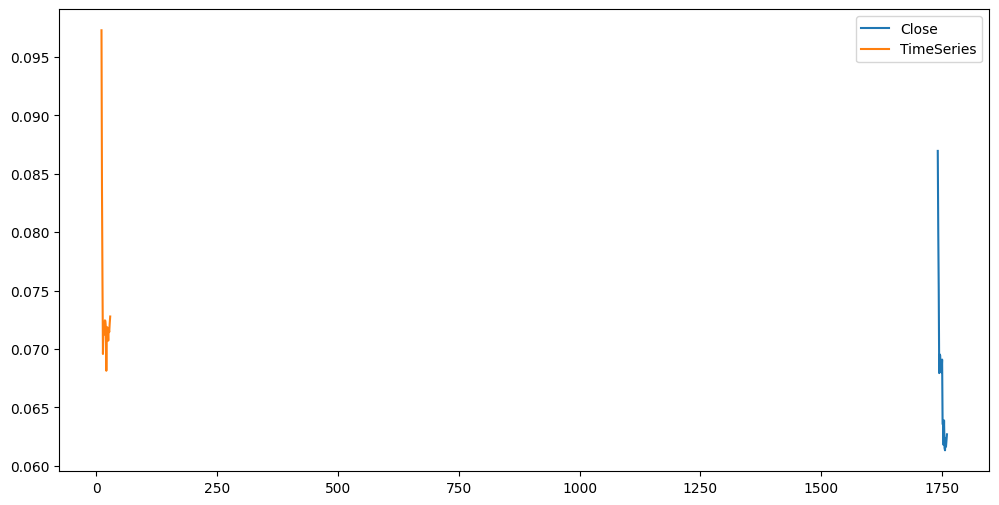

In [ ]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)